<a href="https://colab.research.google.com/github/SwatiPatil2019/ComputerVision/blob/main/CV1_Module2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Computer Vision - I Module 2 Assignment

### Question 1: Opening and Writing to Image Files

- Save the image as **face.png**

In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import imageio

In [2]:
def write_img():
    f = misc.face()
    imageio.imwrite('face.png', f)

    return f

In [3]:
f = write_img()

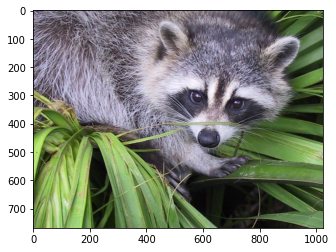

In [4]:
plt.imshow(f)
plt.show()

### Question 2: Create a Numpy Array from an Image File.

- Use image **face.png**, which was created in the previous question.

In [5]:
def create_np_array():
    face = imageio.imread('face.png')
    
    return face

In [6]:
face = create_np_array()

In [7]:
type(face)

imageio.core.util.Array

In [8]:
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

### Question 3: Open Raw File.

- Open **face.raw** 

- Use **dtype=np.uint8**

In [9]:
import numpy as np

In [10]:
# Creating raw file
face.tofile('face.raw')

In [11]:
def open_raw():
    face_from_raw = np.fromfile('face.raw', dtype=np.uint8)

    return face_from_raw

In [12]:
face_from_raw = open_raw()

In [13]:
face_from_raw.shape

(2359296,)

### Question 4: Create a List of Image Files in the Directory.

In [ ]:
for i in range(10):
    im = np.random.randint(0, 256, 10000).reshape((100, 100))
    imageio.imwrite('random_%02d.png' % i, im)

In [ ]:
from glob import glob

In [ ]:
def image_files():
    filelist = glob('random*.png')

    return filelist

In [ ]:
filelist = image_files()
filelist

['random_00.png',
 'random_01.png',
 'random_02.png',
 'random_03.png',
 'random_04.png',
 'random_05.png',
 'random_06.png',
 'random_07.png',
 'random_08.png',
 'random_09.png']

## Displaying Images

Use `matplotlib` and `imshow` to display an image inside a `matplotlib figure`.

### Question 5: Retrieve a Grayscale Image.

- Use `misc.face` with **gray=True** to retrieve image.

In [ ]:
def retrieve_gray():
    f = misc.face(gray=True)

    return f

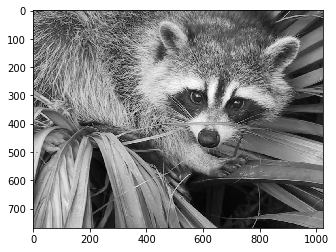

In [ ]:
f = retrieve_gray()

plt.imshow(f, cmap=plt.cm.gray)

### Question 6: Increase Contrast by Setting Min and Max Values.

- Plot the grayscale image **f** from previous question.

- Set **vmin** = **30** and **vmax** = **200**.

- Remove axis and ticks from the plot.

In [ ]:
def vary_contrast():
    plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)        

    # Remove axes and ticks.
    plt.axis('off')

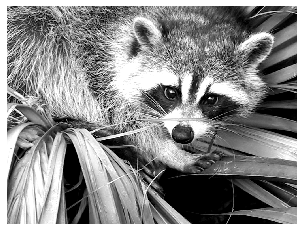

In [ ]:
vary_contrast()

### Question 7: Draw Contour Lines.

- Plot the grayscale image **f** from previous question.


- Provide list [50, 200] as the 2nd parameter to the `plt.contour` function.

In [ ]:
def contour_lines():
    plt.contour(f, [50, 200]) 

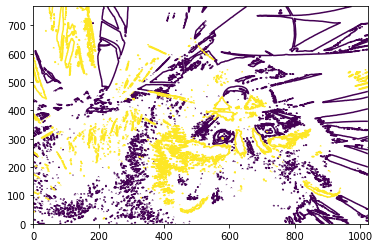

In [ ]:
contour_lines()

### Question 8: Show Smooth Intensity Variation using `interpolation='bilinear'`.

- Pass **f[320:340, 510:530]** as the input image.


- Also, use **cmap=plt.cm.gray**

In [ ]:
def smooth_intensity():
    plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear')

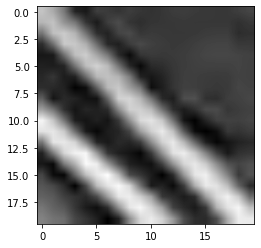

In [ ]:
smooth_intensity()

### Question 9: Show Finer Inspection of Intensity Variations using `interpolation='nearest'`.

- Pass **f[320:340, 510:530]** as the input image.


- Also, use **cmap=plt.cm.gray**

In [ ]:
def finer_intensity():
    plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')

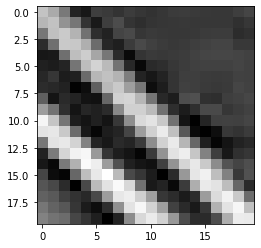

In [ ]:
finer_intensity()

### Question 10: Perform Blurring / Smoothing.

- Perform all the operations on the variable **face**.

In [ ]:
from scipy import misc
from scipy import ndimage

In [ ]:
face = misc.face(gray=True)

In [ ]:
def blurring_smooting():
    blurred_face = ndimage.gaussian_filter(face, sigma=3)
    very_blurred = ndimage.gaussian_filter(face, sigma=5)

    local_mean = ndimage.uniform_filter(face, size=11)
    
    return blurred_face, very_blurred, local_mean

In [ ]:
blurred_face, very_blurred, local_mean = blurring_smooting()

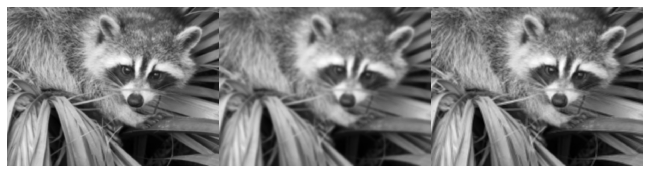

In [ ]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(very_blurred, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(local_mean, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.01, right=0.99)

plt.show()

### Question 11: Perform Sharpening.

- Increasing the weight of edges by adding an approximation of the Laplacian.

- Set **alpha** = **30**.

- Perform all the operations on **blurred_f** in the function.

In [ ]:
face = misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(face, 3)

In [ ]:
def sharp():
    filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
    alpha = 30
    sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

    return filter_blurred_f, alpha, sharpened

In [ ]:
filter_blurred_f, alpha, sharpened = sharp()

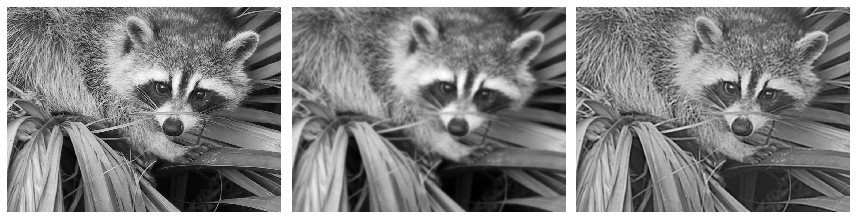

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

### Question 12: Perform Denoising.

- Use **noisy** image for **denoising**.

In [ ]:
from scipy import misc

In [ ]:
f = misc.face(gray=True)
f = f[230:290, 220:320]
noisy = f + 0.4 * f.std() * np.random.random(f.shape)

In [ ]:
def denoising():
    gauss_denoised = ndimage.gaussian_filter(noisy, 2)

    med_denoised = ndimage.median_filter(noisy, 3)

    return gauss_denoised, med_denoised

In [ ]:
gauss_denoised, med_denoised = denoising()

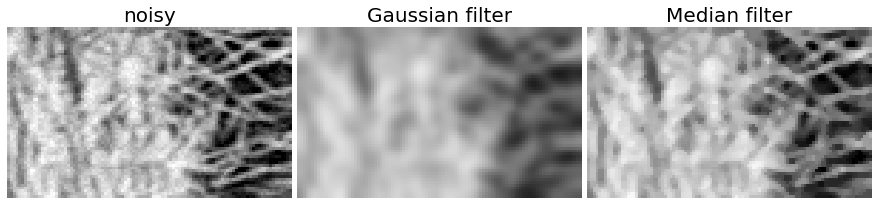

In [ ]:
plt.figure(figsize=(12,2.8))

plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(133)
plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Median filter', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0, right=1)
plt.show()

### Question 13: Use Median filter to perform Denoising on Straight Boundaries (Low Curvature).

In [ ]:
def denoising_straight_bound():
    im = np.zeros((20, 20))
    im[5:-5, 5:-5] = 1
    im = ndimage.distance_transform_bf(im)
    im_noise = im + 0.2 * np.random.randn(*im.shape)
    im_med = ndimage.median_filter(im_noise, 3)

    return im, im_noise, im_med

In [ ]:
im, im_noise, im_med = denoising_straight_bound()

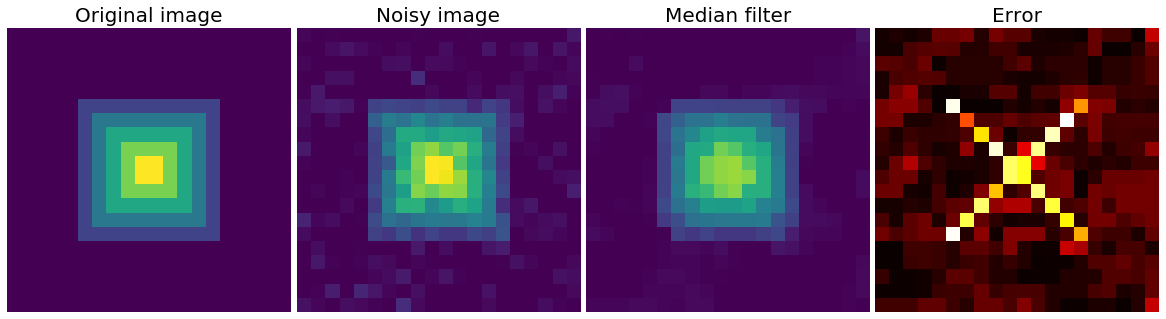

In [ ]:
plt.figure(figsize=(16, 5))

plt.subplot(141)
plt.imshow(im, interpolation='nearest')
plt.axis('off')
plt.title('Original image', fontsize=20)
plt.subplot(142)
plt.imshow(im_noise, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Noisy image', fontsize=20)
plt.subplot(143)
plt.imshow(im_med, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Median filter', fontsize=20)
plt.subplot(144)
plt.imshow(np.abs(im - im_med), cmap=plt.cm.hot, interpolation='nearest')
plt.axis('off')
plt.title('Error', fontsize=20)


plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0, right=1)

plt.show()

### Question 14: Perform Conversion between Color and Gray Values.

- Perform conversion on **img**.

In [ ]:
from skimage.color import rgb2gray
from skimage import data

In [ ]:
img = data.astronaut()

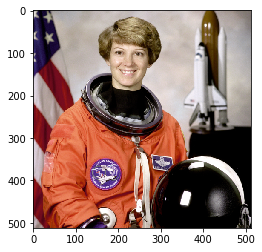

In [ ]:
plt.imshow(img)

In [ ]:
def color_to_gray():
    img_gray = rgb2gray(img)

    return img_gray

In [ ]:
img_gray = color_to_gray()

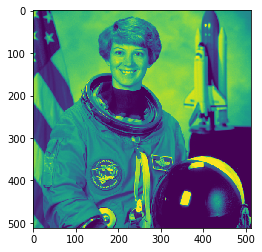

In [ ]:
plt.imshow(img_gray)

### Question 15: Perefrom Image Inversion.

- Perform inversion on **img**.

In [ ]:
from skimage import util

In [ ]:
img = data.camera()

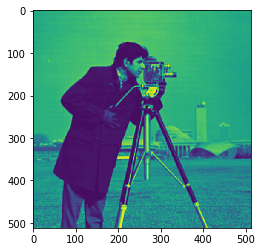

In [ ]:
plt.imshow(img)

In [ ]:
def image_inversion():
    inverted_img = util.invert(img)

    return inverted_img

In [ ]:
inverted_img = image_inversion()

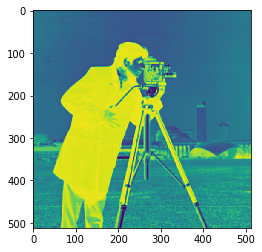

In [ ]:
plt.imshow(inverted_img)